In [1]:
import pandas as pd
import numpy as np

file_path= "/content/Residence-Beginning-Tax-USA (1).csv"
df = pd.read_csv(file_path)
print("Loaded Shape:", df.shape)

Loaded Shape: (16163, 17)


Data Attributes Description

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tax Year                             16163 non-null  int64  
 1   Resident Type                        16163 non-null  object 
 2   Place of Residence                   16163 non-null  object 
 3   Country                              16163 non-null  object 
 4   State                                16163 non-null  object 
 5   County                               16163 non-null  object 
 6   Income Class                         16163 non-null  object 
 7   Disclosure                           187 non-null    object 
 8   Number of All Returns                15976 non-null  float64
 9   NY AGI of All Returns                15976 non-null  float64
 10  Deductions of All Returns            15976 non-null  float64
 11  Dependent Exemptions of All 

In [3]:
df.drop(columns=['Disclosure'], inplace=True)
df.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Number of All Returns',
       'NY AGI of All Returns', 'Deductions of All Returns',
       'Dependent Exemptions of All Returns', 'Taxable Income of All Returns',
       'Tax Before Credits of All Returns', 'Tax Liability of All Returns',
       'Place of Residence Sort Order', 'Income Class Sort Order'],
      dtype='object')

In [4]:
df = df[df["Income Class"] != "Total"]
df["Income Class"].unique()

array(['40,000 - 49,999', '50,000 - 59,999', '60,000 - 74,999',
       'Under 5,000', '5,000 - 9,999', '10,000 - 19,999',
       '20,000 - 29,999', '30,000 - 39,999', '75,000 - 99,999',
       '100,000 - 199,999', '200,000 - 249,999', '250,000 - 499,999',
       '500,000 and over', '200,000 and over'], dtype=object)

Dropeed Irrelevant Records from Income Class Column

In [5]:
replace_map = {
    "Residence Unknown ++++": "Residence Unknown",
    "Residence Unknown ++": "Residence Unknown",
    "Residence Unknown": "Residence Unknown",
    "NYS Unclassified +": "Residence Unknown",
    "Not Applicable": "Residence Unknown",
    "All": "Residence Unknown",
    "All Other Countries +++": "Other Countries",
    "All Other Countries": "Other Countries",
    "Other Countries": "Other Countries",
    "All Other States": "Other States",
}

df["Place of Residence"] = df["Place of Residence"].replace(replace_map)
df["Country"] = df["Country"].replace(replace_map)
df["County"] = df["County"].replace(replace_map)

df = df[df["Place of Residence"].str.contains("Grand Total", na=False) == False]
df = df[df["County"].str.contains("Grand Total", na=False) == False]

print("Place of Residence:", df["Place of Residence"].unique())
print("")
print("Country:", df["Country"].unique())
print("")
print("County:", df["County"].unique())

Place of Residence: ['Ireland' 'A.P.O./F.P.O' 'Canada' 'India' 'Mexico' 'China' 'France'
 'Germany' 'Israel' 'Italy' 'Japan' 'Puerto Rico' 'S. Korea'
 'United Kingdom' 'Other Countries' 'Residence Unknown' 'Other States'
 'Utah' 'Orleans' 'Nevada' 'Hamilton' 'Washington' 'Dutchess'
 'New York City - Richmond' 'Clinton' 'Onondaga' 'Texas' 'Ulster'
 'Livingston' 'New Jersey' 'New York City - Kings' 'Westchester' 'Orange'
 'Cortland' 'Ontario' 'Oswego' 'Sullivan' 'Rockland' 'Missouri' 'Delaware'
 'Oregon' 'Fulton' 'Schoharie' 'Genesee' 'Seneca' 'Albany'
 'New York City - Manhattan' 'Columbia' 'Chautauqua' 'Schuyler' 'Wayne'
 'Tioga' 'Chemung' 'Wyoming' 'Rensselaer' 'California' 'New Hampshire'
 'Herkimer' 'Rhode Island' 'Allegany' 'Colorado' 'Monroe' 'Wisconsin'
 'Jefferson' 'St. Lawrence' 'Montgomery' 'Putnam' 'Illinois' 'Virginia'
 'Ohio' 'Montana' 'Franklin' 'Alabama' 'Saratoga' 'Maine' 'Mississippi'
 'New York City - Queens' 'North Carolina' 'Niagara' 'Kansas'
 'District of Columbia' 

Replaced Irrelevant Data with new columns names

In [6]:
df.isnull().sum()

,0
Tax Year,0
Resident Type,0
Place of Residence,0
Country,0
State,0
County,0
Income Class,0
Number of All Returns,187
NY AGI of All Returns,187
Deductions of All Returns,187


Removed Null Values

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Tax Year,Number of All Returns,NY AGI of All Returns,Deductions of All Returns,Dependent Exemptions of All Returns,Taxable Income of All Returns,Tax Before Credits of All Returns,Tax Liability of All Returns,Place of Residence Sort Order,Income Class Sort Order
count,14268.000000,14268.000000,1.426800e+04,1.426800e+04,14268.000000,1.426800e+04,1.426800e+04,1.426800e+04,14268.00000,14268.000000
mean,2006.066092,6934.438814,5.681722e+05,8.853237e+04,3931.263737,4.619527e+05,3.147668e+04,2.146250e+04,78.76591,6.482618
std,4.074675,18014.285297,3.007593e+06,2.523652e+05,11853.227114,2.744299e+06,2.065444e+05,1.731653e+05,60.17989,3.503002
min,1999.000000,0.000000,-5.528097e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.112970e+05,1.00000,1.000000
25%,2003.000000,199.000000,9.116750e+03,2.562750e+03,37.000000,3.834500e+03,1.807500e+02,2.700000e+01,29.00000,3.000000
50%,2006.000000,1308.000000,6.134500e+04,1.549850e+04,376.000000,3.623200e+04,1.977000e+03,8.715000e+02,56.00000,6.000000
75%,2010.000000,4254.250000,1.976215e+05,4.698025e+04,2158.000000,1.336358e+05,7.913000e+03,5.372000e+03,125.00000,9.000000
max,2012.000000,204225.000000,1.247869e+08,4.928568e+06,130161.000000,1.198454e+08,8.209399e+06,7.782484e+06,214.00000,13.000000


Correlation between Columns

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

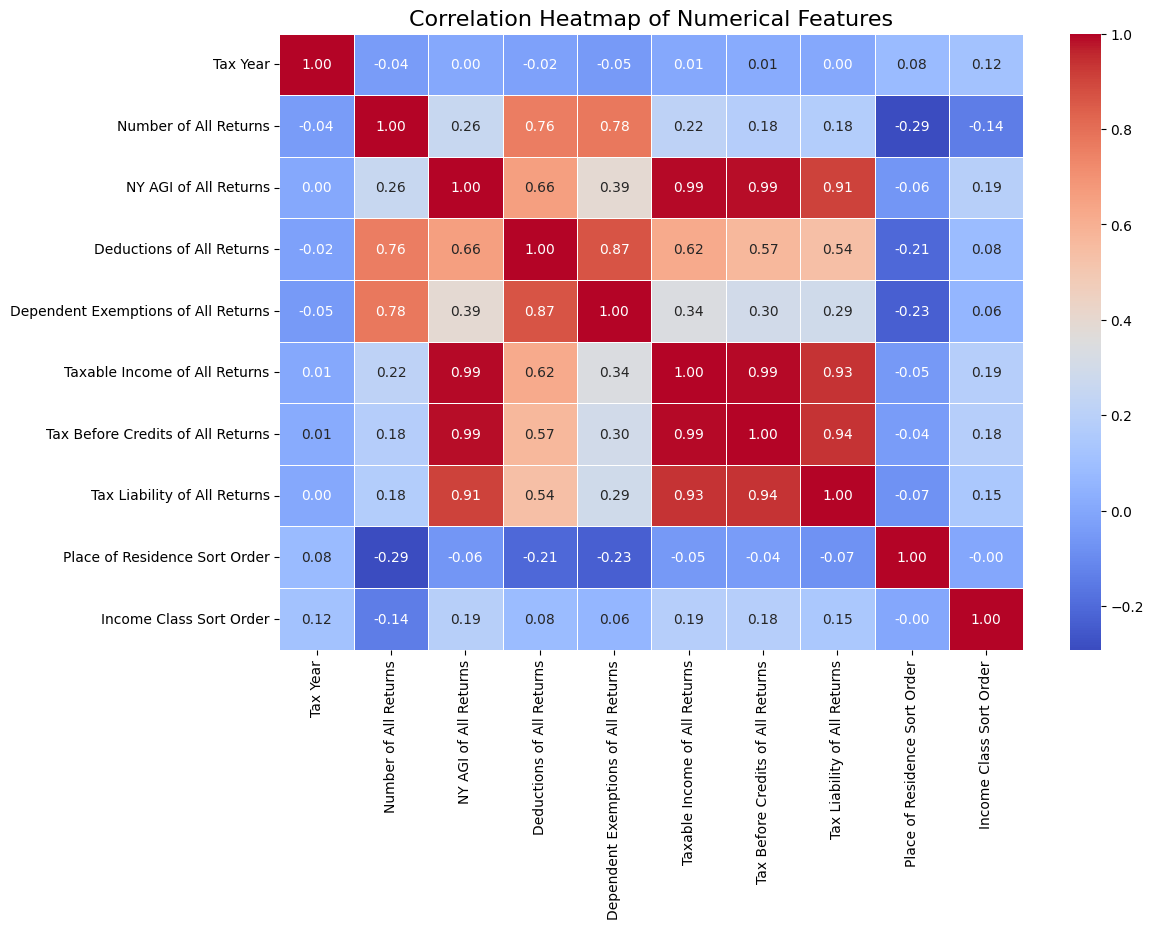

In [10]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

Correlation Heatmap

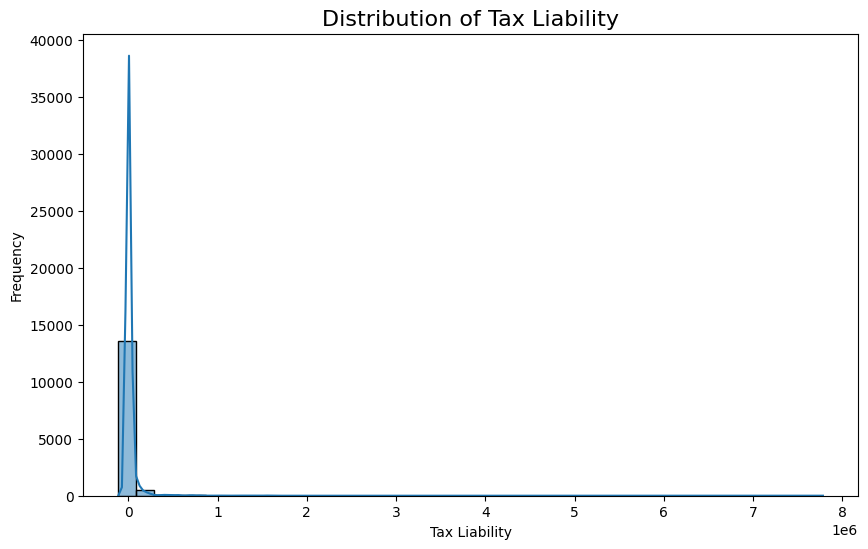

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Tax Liability of All Returns"], kde=True, bins=40)
plt.title("Distribution of Tax Liability", fontsize=16)
plt.xlabel("Tax Liability")
plt.ylabel("Frequency")
plt.show()

Tax Liability Distribution Plot

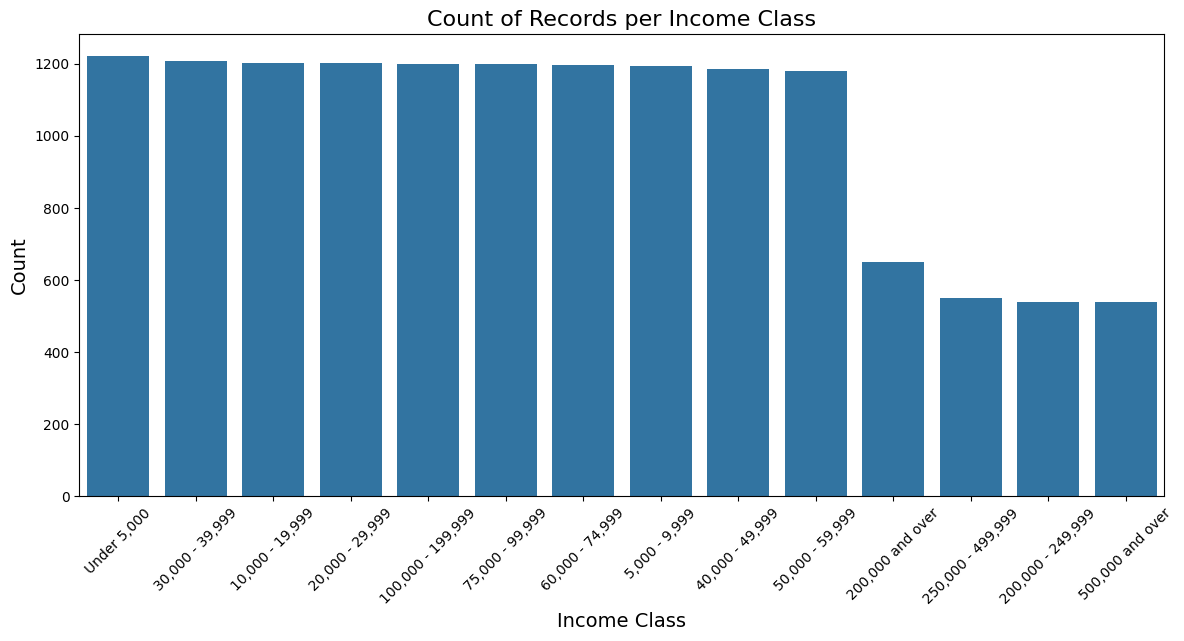

In [12]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="Income Class", order=df["Income Class"].value_counts().index)

plt.title("Count of Records per Income Class", fontsize=16)
plt.xlabel("Income Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Countplot: Income Class

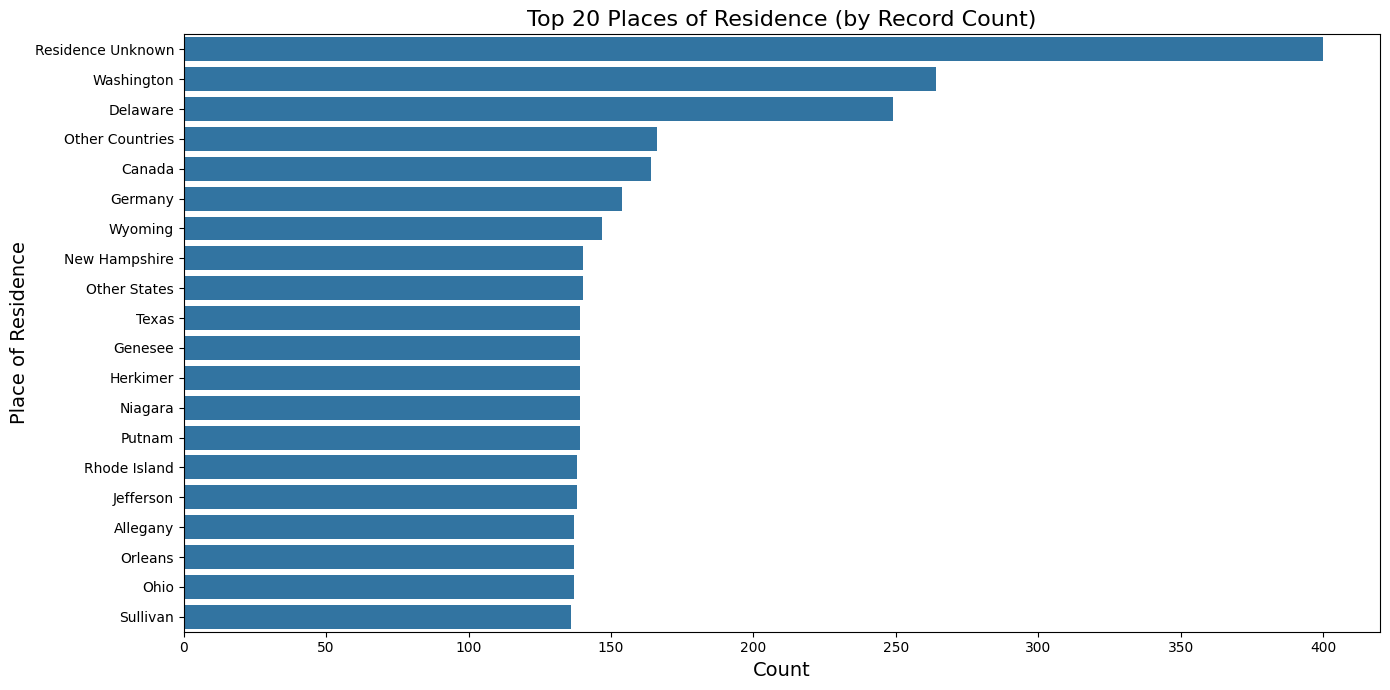

In [13]:
plt.figure(figsize=(14, 7))

top_places = df["Place of Residence"].value_counts().head(20).index

sns.countplot(
    data=df,
    y="Place of Residence",
    order=top_places
)

plt.title("Top 20 Places of Residence (by Record Count)", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Place of Residence", fontsize=14)
plt.tight_layout()
plt.show()

Top 20 Places of Residence Countplot

In [14]:
leakage_cols = [
    "NY AGI of All Returns",
    "Deductions of All Returns",
    "Dependent Exemptions of All Returns",
    "Taxable Income of All Returns",
    "Tax Before Credits of All Returns",
    "Income Class Sort Order",
    "Place of Residence Sort Order"
]

df = df.drop(columns=leakage_cols, errors='ignore')
df.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Number of All Returns',
       'Tax Liability of All Returns'],
      dtype='object')

These Columns can cause data leakage, so we have dropped this columns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [18]:
list_of_cat_cols = df.select_dtypes(include="object").columns.tolist()
list_of_numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
list_of_numeric_cols.remove("Tax Liability of All Returns")
print("Categorical columns:", list_of_cat_cols)
print("Numeric columns:", list_of_numeric_cols)

Categorical columns: ['Resident Type', 'Place of Residence', 'Country', 'State', 'County', 'Income Class']
Numeric columns: ['Tax Year', 'Number of All Returns']


In [24]:
X = df.drop(columns=["Tax Liability of All Returns"])
y = df["Tax Liability of All Returns"]
preprocessor = ColumnTransformer(transformers=[("categorical", OneHotEncoder(handle_unknown="ignore"), list_of_cat_cols),("numeric", "passthrough", list_of_numeric_cols)])
model = Pipeline(steps=[("preprocessor", preprocessor),("regressor", LinearRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Resident Type',
                                                   'Place of Residence',
                                                   'Country', 'State', 'County',
                                                   'Income Class']),
                                                 ('numeric', 'passthrough',
                                                  ['Tax Year',
                                                   'Number of All Returns'])])),
                ('regressor', LinearRegression())])

In [26]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Model Evaluation Metrics:
MAE  : 39266.93
RMSE : 180092.34
R²   : 0.1635


In [31]:
rf_model = Pipeline(steps=[("preprocessor", preprocessor),("regressor", RandomForestRegressor(n_estimators=200,max_depth=None,random_state=42,n_jobs=-1))])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Random Forest Metrics:
MAE  : 2757.90
RMSE : 42786.61
R²   : 0.9528


In [32]:
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [10, 20, None],
    "regressor__min_samples_split": [2, 4, 6],
    "regressor__min_samples_leaf": [1, 2],
    "regressor__max_features": ["sqrt", "log2", None]
}

grid = GridSearchCV(rf_model, param_grid=param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2, error_score=np.nan)
grid.fit(X_train, y_train)
print("Best params (grid):", grid.best_params_)
print("Best CV R2 (grid):", grid.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best params (grid): {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Best CV R2 (grid): 0.9416754186496535


Tunned Random FOrest by using GridSearchCV

In [33]:
best = grid.best_estimator_

# Train predictions
y_train_pred = best.predict(X_train)
# Test predictions
y_test_pred = best.predict(X_test)

def show_metrics(label, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE : {mae:.2f}")
    print(f"{label} RMSE: {rmse:.2f}")
    print(f"{label} R²  : {r2:.4f}\n")

print("TUNED RANDOM FOREST")
show_metrics("Train", y_train, y_train_pred)
show_metrics("Test", y_test, y_test_pred)

TUNED RANDOM FOREST
Train MAE : 960.46
Train RMSE: 14005.75
Train R²  : 0.9929

Test MAE : 2747.45
Test RMSE: 42046.07
Test R²  : 0.9544



In [35]:
preprocessor = best.named_steps["preprocessor"]
model = best.named_steps["regressor"]

ohe = preprocessor.named_transformers_["categorical"]
cat_feature_names = ohe.get_feature_names_out(list_of_cat_cols)
num_feature_names = list_of_numeric_cols
all_feature_names = np.concatenate([cat_feature_names, num_feature_names])
importances = model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

feat_imp.head(20)

,Feature,Importance
277,"Income Class_500,000 and over",0.469200
271,"Income Class_200,000 and over",0.223799
282,Number of All Returns,0.116259
226,County_Manhattan,0.083199
268,"Income Class_100,000 - 199,999",0.023142
74,Place of Residence_New York City - Manhattan,0.016015
272,"Income Class_250,000 - 499,999",0.011909
281,Tax Year,0.008636
66,Place of Residence_Nassau,0.005873
229,County_Nassau,0.005387


Feature Importance

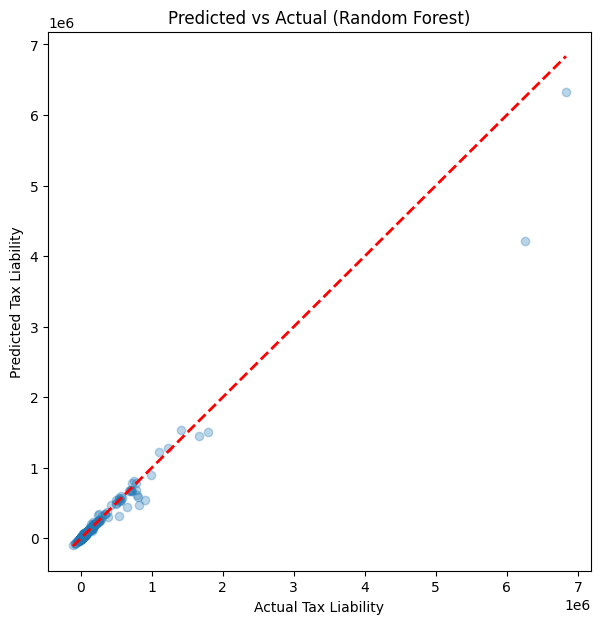

In [36]:
y_test_pred = best.predict(X_test)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Actual Tax Liability")
plt.ylabel("Predicted Tax Liability")
plt.title("Predicted vs Actual (Random Forest)")
lims = [
    np.min([y_test.min(), y_test_pred.min()]),
    np.max([y_test.max(), y_test_pred.max()])
]
plt.plot(lims, lims, 'r--', linewidth=2)

plt.show()

Predicted vs Actual Plot

In [42]:
import joblib

# best is your tuned Random Forest pipeline
joblib.dump(best, "tax_liability_regression_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix